## Task: Cuisine Combination
#### Identify the most common combinations of cuisines in the dataset.
#### Determine if certain cuisine combinations tend to have higher ratings.


 ### Importing the required libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the data set


In [2]:
df=pd.read_excel(r"C:\Users\Lenovo\Downloads\cleaned_data_cognifyz.xlsx")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml Gurme,208,İstanbul,"Kemanke Karamustafa Paa Mahallesi, Rhtm Caddes...",Karaky,"Karaky, stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aac,208,İstanbul,"Kouyolu Mahallesi, Muhittin stnda Caddesi, No ...",Kouyolu,"Kouyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,İstanbul,"Kurueme Mahallesi, Muallim Naci Caddesi, No 56...",Kurueme,"Kurueme, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Ak Kahve,208,İstanbul,"Kurueme Mahallesi, Muallim Naci Caddesi, No 64...",Kurueme,"Kurueme, stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


### Identifying the Most Common Cuisine Combinations


In [3]:
cuisine_combinations = df['Cuisines'].value_counts()

In [4]:
cuisine_combinations_filtered = cuisine_combinations[cuisine_combinations.index.str.count(',') > 0]
print("Most Common Cuisine Combinations:")
cuisine_combinations_filtered.head(10)


Most Common Cuisine Combinations:


Cuisines
North Indian, Chinese             511
North Indian, Mughlai             334
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Pizza, Fast Food                  131
Chinese, Fast Food                118
Mithai, Street Food               116
Bakery, Fast Food                 108
Chinese, North Indian             105
Ice Cream, Desserts                83
Name: count, dtype: int64

### Calculating the Average Ratings for Each Cuisine Combination

In [5]:
# Group by 'Cuisines' and calculating the mean 'Aggregate rating'
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)


In [10]:
# Filtering out single cuisines from the ratings (focusing on combinations)
cuisine_ratings_filtered = cuisine_ratings[cuisine_ratings.index.str.count(',') > 0]
print("Cuisine Combinations with Highest Average Ratings:")
cuisine_ratings_filtered.head(10)

Cuisine Combinations with Highest Average Ratings:


Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64

 ### Selecting Top 10 Combinations with Highest Average Ratings

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3448\2376390256.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cuisine_combinations.index, x=top_cuisine_combinations.values, palette='viridis')


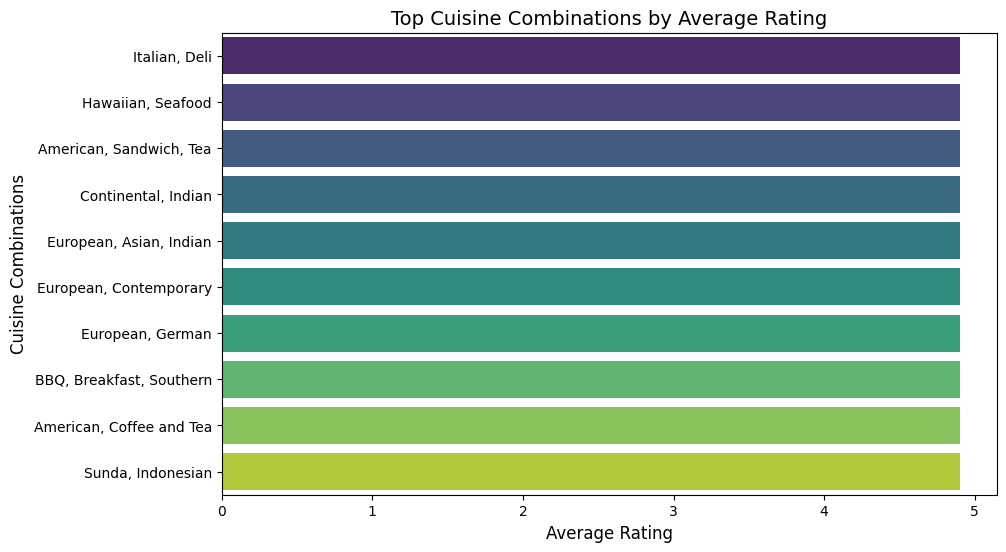

In [7]:

top_cuisine_combinations = cuisine_ratings_filtered.head(10)

# Plot the Top 10 Cuisine Combinations by Average Rating
plt.figure(figsize=(10, 6))
sns.barplot(y=top_cuisine_combinations.index, x=top_cuisine_combinations.values, palette='viridis')
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Cuisine Combinations', fontsize=12)
plt.title('Top Cuisine Combinations by Average Rating', fontsize=14)
plt.show()

### Summary of Findings

In [8]:
# Most Common Cuisine Combinations:
cuisine_combinations_filtered.head(10)

Cuisines
North Indian, Chinese             511
North Indian, Mughlai             334
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Pizza, Fast Food                  131
Chinese, Fast Food                118
Mithai, Street Food               116
Bakery, Fast Food                 108
Chinese, North Indian             105
Ice Cream, Desserts                83
Name: count, dtype: int64

In [9]:
#Cuisine Combinations with Higher Ratings:
cuisine_ratings_filtered.head(10)

Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64